It is also possible to study the OTOC $F(t) = \langle W(t)^\dagger V(0)^\dagger W(t) V(0)\rangle $ with different choices of initial operator $W(0)$. We want this operator to begin as something simple, which in this case we take to mean that $W(0)$ should be a product operator. Since super-cliffords are constrained to lie in the subspace of operator space spanned by strings of $X$ and $Y$, we will consider arbitrary initial product states made up of $X$ and $Y$.


In [9]:
import stim
import matplotlib.pyplot as plt
from supercliffords.circuits import ThreeQuarterCircuit
from supercliffords.gates import C3

# Build the circuit class:
n_qubits = 120
slow = 10

# Select the initial operator W(0).
op_string = "Y" + ("X" * 119)
first_circuit = ThreeQuarterCircuit(n_qubits, slow, op_string)

# If no initial operator is selected, the default is "XX...X".
second_circuit = ThreeQuarterCircuit(n_qubits, slow)

In [ ]:
t = 100
res = 1
rep = 50
n_jobs = 4

s = stim.TableauSimulator()

c.append_operation(
    "I", [n_qubits - 1]
)  # Need to initialize the tableau with correct number of qubits, otherwise otoc calculation will fail.
s.do(c)
s.do(C3(0, 1, 2))
f1, ts = second_circuit.compute_otoc_parallel(t, res, rep, s, n_jobs)
f2, ts = first_circuit.compute_otoc_parallel(t, res, rep, s, n_jobs)

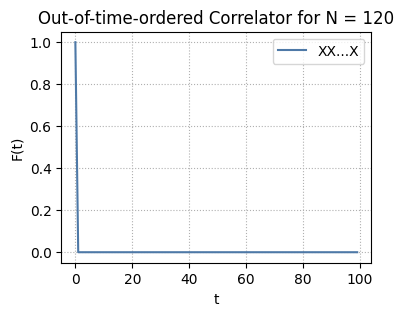

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(ts, f1, color="#b3669e", label="YX...X")
plt.plot(ts, f2, color="#4e79a7", label="XX...X")
plt.xlabel("t")
plt.ylabel("F(t)")
plt.title(f"Out-of-time-ordered Correlator for N = {n_qubits}")
plt.grid(linestyle="dotted")
plt.legend()
plt.show()